In [106]:
import tweepy
import csv
import pandas as pd
import random
import numpy as np
import pandas as pd
import re

In [107]:
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment.util import *
import matplotlib.pyplot as plt

## API Connection

In [108]:
consumer_key = '3jmA1BqasLHfItBXj3KnAIGFB'
consumer_secret = 'imyEeVTctFZuK62QHmL1I0AUAMudg5HKJDfkx0oR7oFbFinbvA'

access_token = '265857263-pF1DRxgIcxUbxEEFtLwLODPzD3aMl6d4zOKlMnme'
access_token_secret = 'uUFoOOGeNJfOYD3atlcmPtaxxniXxQzAU4ESJLopA1lbC'

auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)

## Check API connection validity

In [109]:
try:
    user = api.verify_credentials()
    # Get rate limit status for search tweets endpoint
    rate_limit_status = api.rate_limit_status()['resources']['search']['/search/tweets']
    # Retrieve the remaining limit and the reset time for the endpoint
    remaining_limit = rate_limit_status['remaining']
    
    print(f"Connected To Twitter API Successfully.\nUser : {user.screen_name}\nMaximum count limit : {remaining_limit}\nRest")
except tweepy.TweepError as e:
    print(f"Error : Failed to connect to twitter API - {str(e)}\n")

Connected To Twitter API Successfully.
User : eswastha
Maximum count limit : 174
Rest


## Getting the tiwtter posts

In [110]:
# Define the search query and parameters
search_query = "#unitedAIRLINES"
count = 1000
lang = "en"
result_type = "mixed"


In [111]:
fetch_tweets = tweepy.Cursor(api.search_tweets, q=search_query, count=count, lang=lang, result_type=result_type).items(count)

In [112]:
df = pd.DataFrame(columns=['Date', 'Tweets'])

In [113]:
for tweet_info in fetch_tweets:
    created_at = tweet_info.created_at.date()
    full_text = tweet_info.text

    # Append a new row to the DataFrame
    df.loc[len(df)] = [created_at, full_text]

In [114]:
df

,Date,Tweets
0,2023-05-26,Good information in case this happens to you o...
1,2023-05-26,#AviationNews #Berlin #UnitedAirlines United A...
2,2023-05-26,Did you fly with United Airlines? Were you on ...
3,2023-05-26,Attention all United Airlines passengers. Were...
4,2023-05-26,Attention all United Airlines passengers. Were...
...,...,...
473,2023-05-17,Traveling soon and need to bring your CPAP Mac...
474,2023-05-17,#UAL83 (B789): #DEL (New Delhi) to #EWR (Newar...
475,2023-05-17,#unitedairlines just as bad as spirit now
476,2023-05-16,ICAO: A8AFEC\nFlt: UAL962 #UnitedAirlines #EWR...


## Cleaning the data from spaciel characters

In [115]:
c_df = pd.DataFrame(columns=['Date', 'Tweets'])
for index, row in df.iterrows():
    temp_text = row['Tweets']
    my_new_string = re.sub('[^ a-zA-Z0-9]', "", temp_text)
    # '[^ a-zA-Z0-9]' - meaning not match, any char that is not one of the chars replace it with an empty string ""
    c_df.loc[len(c_df)] = [df.loc[index, 'Date'], my_new_string]

'[^ a-zA-Z0-9]' - meaning not match, any char that is not one of the chars replace it with an empty string 
if write the same thing but without the ^ sign than it means every thing that matches it change it

In [116]:
c_df

,Date,Tweets
0,2023-05-26,Good information in case this happens to you o...
1,2023-05-26,AviationNews Berlin UnitedAirlines United Airl...
2,2023-05-26,Did you fly with United Airlines Were you on f...
3,2023-05-26,Attention all United Airlines passengers Were ...
4,2023-05-26,Attention all United Airlines passengers Were ...
...,...,...
473,2023-05-17,Traveling soon and need to bring your CPAP Mac...
474,2023-05-17,UAL83 B789 DEL New Delhi to EWR Newark NJ 05 m...
475,2023-05-17,unitedairlines just as bad as spirit now
476,2023-05-16,ICAO A8AFECFlt UAL962 UnitedAirlines EWRBERFir...


Beacuase there are many tweets on the same day , i want to combine the tweets together into a singal date 

In [117]:
c_df_c = pd.DataFrame(columns=['Date', 'Tweets', 'Number Of Tweets'])
get_tweet = ""
num_of_tweets = 1

In [118]:
for index, row in c_df.iterrows():
    date = row['Date']
    tweet = row['Tweets']

    if index > 0 and date == c_df.loc[index - 1, 'Date']:
        get_tweet += " " + tweet
        num_of_tweets += 1
    else:
        if index > 0:
            c_df_c.loc[len(c_df_c)] = [prev_date, get_tweet, num_of_tweets]
        get_tweet = tweet  # Start a new get_tweet for the new date
        num_of_tweets = 1

    prev_date = date

# Append the last date and get_tweet to the combined DataFrame
c_df_c.loc[len(c_df_c)] = [prev_date, get_tweet, num_of_tweets]

We need to append the data after the for loop becuase if all the dates are the same from a certain point

until the end of the for loop than the "else" wont iterate meaning the last tweets with the same date wont append inside

the Data Frame

In [119]:
c_df_c

,Date,Tweets,Number Of Tweets
0,2023-05-26,Good information in case this happens to you o...,23
1,2023-05-25,Just in United Airlines under fire for downgra...,57
2,2023-05-24,Hey United Airlines Dont make us give up our f...,50
3,2023-05-23,MollyAMcGrath UnitedAirlines does not charge b...,68
4,2023-05-22,RT GaryHershorn Another night with the sun bei...,104
5,2023-05-21,ICAO A0566AFlt UAL124 UnitedAirlines EWRATHFir...,58
6,2023-05-20,ICAO A2BBF2Flt UAL549 UnitedAirlines BOSORDFir...,30
7,2023-05-19,Whats with me and airplanes since start of 202...,36
8,2023-05-18,BREAKING NEWS A TikTok influencer has accused ...,27
9,2023-05-17,What do you own the world How do you own disor...,23


Getting the united airlines stock data from yahoo finance.

Download the csv file from thier website , what intersts us in the file is the close price

In [120]:
stock_close_p = pd.read_csv('UAL.csv')
stock_close_p['Date'] = pd.to_datetime(stock_close_p['Date'], dayfirst=True).dt.date

We change the Date column and update its values to be as the same dat foramt as in the tweets so we can compare between them

In [121]:
stock_close_p.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-05-24,43.650002,43.990002,41.000000,41.570000,41.570000,13328500
1,2022-05-25,41.410000,43.240002,41.230000,43.080002,43.080002,11007500
2,2022-05-26,43.730000,46.639999,43.639999,46.070000,46.070000,13896000
3,2022-05-27,46.419998,48.630001,46.400002,48.410000,48.410000,10995200
4,2022-05-31,46.790001,48.500000,46.310001,47.630001,47.630001,16931800


In [122]:
c_df_c['Price'] = ""
# Appending to the clean data the close prices for each date
for index_api, row_api in c_df_c.iterrows():
    for index_csv, row_csv in stock_close_p.iterrows():
        if row_api['Date'] == row_csv['Date']:
            c_df_c.loc[index_api, 'Price'] = format(row_csv['Close'], '.2f')

In [123]:
c_df_c

,Date,Tweets,Number Of Tweets,Price
0,2023-05-26,Good information in case this happens to you o...,23,
1,2023-05-25,Just in United Airlines under fire for downgra...,57,
2,2023-05-24,Hey United Airlines Dont make us give up our f...,50,
3,2023-05-23,MollyAMcGrath UnitedAirlines does not charge b...,68,47.87
4,2023-05-22,RT GaryHershorn Another night with the sun bei...,104,47.41
5,2023-05-21,ICAO A0566AFlt UAL124 UnitedAirlines EWRATHFir...,58,
6,2023-05-20,ICAO A2BBF2Flt UAL549 UnitedAirlines BOSORDFir...,30,
7,2023-05-19,Whats with me and airplanes since start of 202...,36,47.54
8,2023-05-18,BREAKING NEWS A TikTok influencer has accused ...,27,48.13
9,2023-05-17,What do you own the world How do you own disor...,23,47.75


Prices are fetched but some enteries are blank as close price might not be 
available for that day due to some reason (like holiday, etc.)
So we take the mean for the close price and put it in the blank value to fill it with other values

In [124]:
summ = 0
count = 0
for index, row in c_df_c.iterrows():
    if row['Price'] != "":
        summ = summ + float(row['Price'])
        count += 1
mean = summ/count
mean = format(mean, '.2f')
print(mean)

47.34


In [125]:
for index, row in c_df_c.iterrows():
    if row['Price'] == "":
        c_df_c.loc[index, 'Price'] = mean
print(f"the average price : {mean}")

the average price : 47.34


In [126]:
c_df_c

,Date,Tweets,Number Of Tweets,Price
0,2023-05-26,Good information in case this happens to you o...,23,47.34
1,2023-05-25,Just in United Airlines under fire for downgra...,57,47.34
2,2023-05-24,Hey United Airlines Dont make us give up our f...,50,47.34
3,2023-05-23,MollyAMcGrath UnitedAirlines does not charge b...,68,47.87
4,2023-05-22,RT GaryHershorn Another night with the sun bei...,104,47.41
5,2023-05-21,ICAO A0566AFlt UAL124 UnitedAirlines EWRATHFir...,58,47.34
6,2023-05-20,ICAO A2BBF2Flt UAL549 UnitedAirlines BOSORDFir...,30,47.34
7,2023-05-19,Whats with me and airplanes since start of 202...,36,47.54
8,2023-05-18,BREAKING NEWS A TikTok influencer has accused ...,27,48.13
9,2023-05-17,What do you own the world How do you own disor...,23,47.75


Convert the Price column from a string type into a float type in order to make mathematical operations

In [127]:
c_df_c['Price'] = c_df_c['Price'].apply(np.float64)

Adding 4 new columns in our dataframe so that sentiment analysis could be performed.. Comp is "Compound" it will tell whether the statement is overall negative or positive. If it has negative value then it is negative, if it has positive value then it is positive. If it has value 0, then it is neutral.

In [128]:
c_df_c["Comp"] = ''
c_df_c["Negative"] = ''
c_df_c["Neutral"] = ''
c_df_c["Positive"] = ''
c_df_c

,Date,Tweets,Number Of Tweets,Price,Comp,Negative,Neutral,Positive
0,2023-05-26,Good information in case this happens to you o...,23,47.34,,,,
1,2023-05-25,Just in United Airlines under fire for downgra...,57,47.34,,,,
2,2023-05-24,Hey United Airlines Dont make us give up our f...,50,47.34,,,,
3,2023-05-23,MollyAMcGrath UnitedAirlines does not charge b...,68,47.87,,,,
4,2023-05-22,RT GaryHershorn Another night with the sun bei...,104,47.41,,,,
5,2023-05-21,ICAO A0566AFlt UAL124 UnitedAirlines EWRATHFir...,58,47.34,,,,
6,2023-05-20,ICAO A2BBF2Flt UAL549 UnitedAirlines BOSORDFir...,30,47.34,,,,
7,2023-05-19,Whats with me and airplanes since start of 202...,36,47.54,,,,
8,2023-05-18,BREAKING NEWS A TikTok influencer has accused ...,27,48.13,,,,
9,2023-05-17,What do you own the world How do you own disor...,23,47.75,,,,


In [129]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

sentiment = SentimentIntensityAnalyzer()

sentence = unicodedata.normalize('NFKD', c_df_c.loc[0,'Tweets'])
sentence_sentiment = sentiment.polarity_scores(sentence)
print(sentence_sentiment)

{'neg': 0.021, 'neu': 0.848, 'pos': 0.131, 'compound': 0.9918}


polarity_scores inherits the sentence we provide 4 parmeters:

neg - negativity , neu - neutral , pos - positivity , compound

In [130]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

sentiment = SentimentIntensityAnalyzer()

for index, row in c_df_c.iterrows():
    try:
        sentence = unicodedata.normalize('NFKD', row['Tweets'])
        sentence_sentiment = sentiment.polarity_scores(sentence)
        
        c_df_c.loc[index, 'Comp'] = sentence_sentiment['compound']
        c_df_c.loc[index, 'Negative'] = sentence_sentiment['neg']
        c_df_c.loc[index, 'Neutral'] = sentence_sentiment['neu']
        c_df_c.loc[index, 'Positive'] = sentence_sentiment['pos']
    except TypeError:
        print(c_df_c.loc[index, 'Tweets'])
        print(index)


Relevant document:
https://www.nltk.org/_modules/nltk/sentiment/vader.html

Purpose of unicodedata in the code:

The unicodedata module is used to normalize the text in the 'Tweets' column of the DataFrame.

It helps to ensure consistent handling and comparison of characters in the text data.

to normalize the text is not a must but it is common in order to prevent errors

Normalization forms and their brief explanations:

NFC (Normalization Form C): Ensures fully composed characters.

NFD (Normalization Form D): Decomposes characters into base characters and combining characters.

NFKC (Normalization Form KC): Compatibility normalization, which can replace certain characters with their compatibility equivalents.

NFKD (Normalization Form KD): Compatibility normalization with decomposition, similar to NFKC but also decomposes characters into base characters and combining characters.

after checking the values with the 4 options i found only slight changes in the values that didnt effect much

In [131]:
c_df_c

,Date,Tweets,Number Of Tweets,Price,Comp,Negative,Neutral,Positive
0,2023-05-26,Good information in case this happens to you o...,23,47.34,0.9918,0.021,0.848,0.131
1,2023-05-25,Just in United Airlines under fire for downgra...,57,47.34,0.9994,0.057,0.761,0.182
2,2023-05-24,Hey United Airlines Dont make us give up our f...,50,47.34,0.9995,0.081,0.686,0.233
3,2023-05-23,MollyAMcGrath UnitedAirlines does not charge b...,68,47.87,0.9998,0.043,0.74,0.217
4,2023-05-22,RT GaryHershorn Another night with the sun bei...,104,47.41,0.9996,0.006,0.88,0.115
5,2023-05-21,ICAO A0566AFlt UAL124 UnitedAirlines EWRATHFir...,58,47.34,0.9997,0.018,0.759,0.224
6,2023-05-20,ICAO A2BBF2Flt UAL549 UnitedAirlines BOSORDFir...,30,47.34,0.9626,0.076,0.812,0.112
7,2023-05-19,Whats with me and airplanes since start of 202...,36,47.54,0.9966,0.082,0.748,0.169
8,2023-05-18,BREAKING NEWS A TikTok influencer has accused ...,27,48.13,0.9991,0.028,0.731,0.241
9,2023-05-17,What do you own the world How do you own disor...,23,47.75,0.9955,0.045,0.777,0.178


##### Calculating the percentage of postive and negative tweets, and plotting the PIE chart for the same.

% of positive tweets =  90.9090909090909
% of negative tweets =  0.0


[]

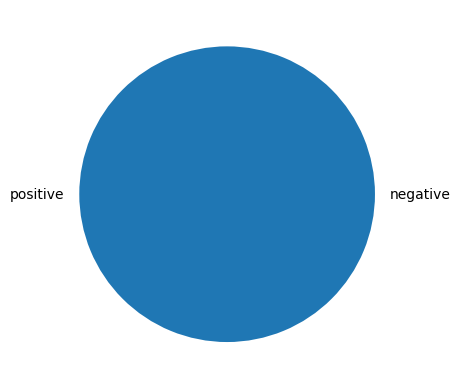

In [132]:
posi = 0
nega = 0
for index,row in c_df_c.iterrows():
    get_val = row['Comp']
    if get_val > 0:
        posi += 1
    if get_val < 0:
        nega += 1
posi_cal = (posi/len(c_df_c)) * 100
nega_cal = (nega/len(c_df_c)) * 100
print("% of positive tweets = ",posi_cal)
print("% of negative tweets = ",nega_cal)

arr=np.asarray([posi_cal,nega_cal], dtype=float)
plt.pie(x=arr,labels=['positive','negative'])
plt.plot()

##### Making a new dataframe with necessary columns for providing machine learning.

In [133]:
df_copy = c_df_c[['Date','Price','Comp','Negative','Neutral','Positive']].copy()

In [134]:
df_copy

,Date,Price,Comp,Negative,Neutral,Positive
0,2023-05-26,47.34,0.9918,0.021,0.848,0.131
1,2023-05-25,47.34,0.9994,0.057,0.761,0.182
2,2023-05-24,47.34,0.9995,0.081,0.686,0.233
3,2023-05-23,47.87,0.9998,0.043,0.74,0.217
4,2023-05-22,47.41,0.9996,0.006,0.88,0.115
5,2023-05-21,47.34,0.9997,0.018,0.759,0.224
6,2023-05-20,47.34,0.9626,0.076,0.812,0.112
7,2023-05-19,47.54,0.9966,0.082,0.748,0.169
8,2023-05-18,48.13,0.9991,0.028,0.731,0.241
9,2023-05-17,47.75,0.9955,0.045,0.777,0.178


###### Dividing the dataset into train and test.

In [135]:
# 70% of the data will be training and 30% will be for testing
train_start_index = 0
train_end_index = 7
test_start_index = 8
test_end_index = 10
train = df_copy.loc[train_start_index : train_end_index,:]
test = df_copy.loc[test_start_index:test_end_index,:]

In [136]:
train

,Date,Price,Comp,Negative,Neutral,Positive
0,2023-05-26,47.34,0.9918,0.021,0.848,0.131
1,2023-05-25,47.34,0.9994,0.057,0.761,0.182
2,2023-05-24,47.34,0.9995,0.081,0.686,0.233
3,2023-05-23,47.87,0.9998,0.043,0.74,0.217
4,2023-05-22,47.41,0.9996,0.006,0.88,0.115
5,2023-05-21,47.34,0.9997,0.018,0.759,0.224
6,2023-05-20,47.34,0.9626,0.076,0.812,0.112
7,2023-05-19,47.54,0.9966,0.082,0.748,0.169


In [137]:
test

,Date,Price,Comp,Negative,Neutral,Positive
8,2023-05-18,48.13,0.9991,0.028,0.731,0.241
9,2023-05-17,47.75,0.9955,0.045,0.777,0.178
10,2023-05-16,45.35,0.0,0.0,1.0,0.0


Making a 2D array that will store the Negative and Positive sentiment for Training dataset.

In [138]:
sentiment_score_list_train = []
for _, row in train.iterrows():
    score = np.asarray([row['Negative'],row['Positive']])
    sentiment_score_list_train.append(score)
numpy_df_train = np.asarray(sentiment_score_list_train)

In [139]:
numpy_df_train

array([[0.021, 0.131],
       [0.057, 0.182],
       [0.081, 0.233],
       [0.043, 0.217],
       [0.006, 0.115],
       [0.018, 0.224],
       [0.076, 0.112],
       [0.082, 0.169]])

Making a 2D array that will store the Negative and Positive sentiment for Training dataset.

In [140]:
sentiment_score_list_test = []
for _, row in test.iterrows():
    score = np.asarray([row['Negative'],row['Positive']])
    sentiment_score_list_test.append(score)
numpy_df_test = np.asarray(sentiment_score_list_test)

In [141]:
numpy_df_test

array([[0.028, 0.241],
       [0.045, 0.178],
       [0.   , 0.   ]])

In [142]:
y_train = pd.DataFrame(train['Price'])
y_test = pd.DataFrame(test['Price'])
print(y_train)

   Price
0  47.34
1  47.34
2  47.34
3  47.87
4  47.41
5  47.34
6  47.34
7  47.54


Changing the array to a 1D

In [143]:
y_train.values

array([[47.34],
       [47.34],
       [47.34],
       [47.87],
       [47.41],
       [47.34],
       [47.34],
       [47.54]])

In [144]:
y_train.values.ravel()

array([47.34, 47.34, 47.34, 47.87, 47.41, 47.34, 47.34, 47.54])

### Making Predictions

In [145]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train.values.ravel())

RandomForestRegressor()

In [146]:
prediction = rf.predict(numpy_df_test)

In [147]:
prediction

array([47.4806, 47.5303, 47.4105])

The training works as follows:

rf = RandomForestRegressor() ---> meaning it is an instance of that Object

rf.fit(numpy_df_train, y_train.values.ravel()) ---> fit is responsible for the traning , we need to remember

numpy_df_train equals the 2D array which contains 70% of the positive/negative values.

y_train equals the prices according to the positive/negative values respectively.

we train the machine with the traning values and test the prediction with test values, the numpy_df_test is

the 2D array which contains the 30% of the positive and negative values.

The result we get is the predicted prices accoring to the positive and negative values.

By using fit, we train the machine to understand the correlation between negative and positive results

Therefore, it could estimate the price.


# Plotting the graph for the Predicted_price VS Actual Price

we want to compare the actual price which is the y_test (30%) of the values we kept for testing

and compare them the prediction prices that we recived

In [148]:
prediction_df = pd.DataFrame(data=prediction[:],columns=['Price'])

In [149]:
prediction_df

,Price
0,47.4806
1,47.5303
2,47.4105


In [150]:
y_test = y_test.reset_index(drop=True)
y_test

,Price
0,48.13
1,47.75
2,45.35


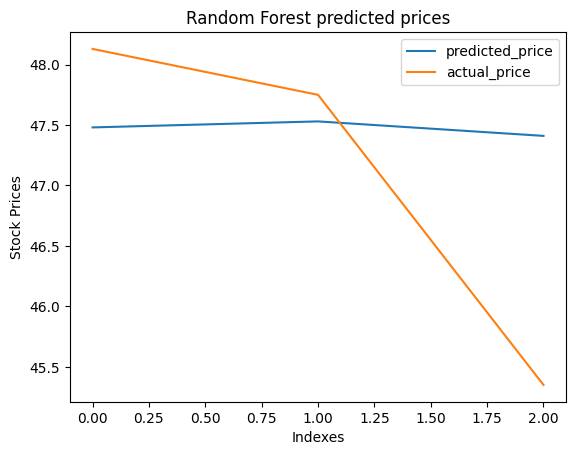

In [151]:
ax = prediction_df.rename(columns={"Price": "predicted_price"}).plot(title='Random Forest predicted prices')#predicted value
ax.set_xlabel("Indexes")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"Price": "actual_price"}).plot(ax=ax).get_figure()
fig.savefig("random forest.png")

plot(ax=ax) allows you to overlay the actual prices on the same plot (same graph), and .get_figure() retrieves the figure object associated with the plot for saving it as an image.

without calling .get_figure(), you would not be able to save the image using the savefig() method

## Getting tweets trough twitter API's is very limited , only 300 tweets comments isnt enough evaluate the price prediction so im moving to a csv file which has allot more data than a few comments 

link to the file - https://www.kaggle.com/datasets/equinxx/stock-tweets-for-sentiment-analysis-and-prediction

# Reading the tweets file 

In [152]:
tweets_file_df = pd.read_csv('tesla_tweets.csv')

In [153]:
tweets_file_df

,row ID,Tweet,Time,Retweet from,User
0,Row0,@MeltingIce Assuming max acceleration of 2 to ...,2017-09-29 17:39:19,NaN,elonmusk
1,Row1,RT @SpaceX: BFR is capable of transporting sat...,2017-09-29 10:44:54,SpaceX,elonmusk
2,Row2,@bigajm Yup :),2017-09-29 10:39:57,NaN,elonmusk
3,Row3,Part 2 https://t.co/8Fvu57muhM,2017-09-29 09:56:12,NaN,elonmusk
4,Row4,Fly to most places on Earth in under 30 mins a...,2017-09-29 09:19:21,NaN,elonmusk
...,...,...,...,...,...
3213,Row3213,"@YOUSRC Amos's article was fair, but his edito...",2012-11-20 08:52:03,NaN,elonmusk
3214,Row3214,These articles in Space News describe why Aria...,2012-11-20 08:38:31,NaN,elonmusk
3215,Row3215,Was misquoted by BBC as saying Europe's rocket...,2012-11-20 08:30:44,NaN,elonmusk
3216,Row3216,Just returned from a trip to London and Oxford...,2012-11-19 08:59:46,NaN,elonmusk


In [154]:
tweets_file_df = tweets_file_df.drop(['User','Retweet from','row ID'], axis=1)

In [155]:
tweets_file_df = tweets_file_df.rename(columns={'Time': 'Date'})

In [156]:
tweets_file_df['Date'] = pd.to_datetime(tweets_file_df['Date'], dayfirst=True).dt.date

In [157]:
tweets_file_df

,Tweet,Date
0,@MeltingIce Assuming max acceleration of 2 to ...,2017-09-29
1,RT @SpaceX: BFR is capable of transporting sat...,2017-09-29
2,@bigajm Yup :),2017-09-29
3,Part 2 https://t.co/8Fvu57muhM,2017-09-29
4,Fly to most places on Earth in under 30 mins a...,2017-09-29
...,...,...
3213,"@YOUSRC Amos's article was fair, but his edito...",2012-11-20
3214,These articles in Space News describe why Aria...,2012-11-20
3215,Was misquoted by BBC as saying Europe's rocket...,2012-11-20
3216,Just returned from a trip to London and Oxford...,2012-11-19


In [158]:
sorted_df = tweets_file_df.sort_values('Date')
sorted_df

,Tweet,Date
3217,RT @Jon_Favreau: My Model S just arrived and I...,2012-11-16
3216,Just returned from a trip to London and Oxford...,2012-11-19
3214,These articles in Space News describe why Aria...,2012-11-20
3211,"Btw, I don't think Apple is doomed. Just won't...",2012-11-20
3215,Was misquoted by BBC as saying Europe's rocket...,2012-11-20
...,...,...
7,Mars City\nOpposite of Earth. Dawn and dusk sk...,2017-09-29
8,Moon Base Alpha https://t.co/voY8qEW9kl,2017-09-29
10,"RT @SpaceX: Nine years ago today, Falcon 1 bec...",2017-09-29
5,RT @SpaceX: Supporting the creation of a perma...,2017-09-29


# Combining all the tweets into one line for each date 

In [159]:
stocks_dataf = pd.DataFrame(columns=['Date', 'Tweet'])
get_tweet = ""
for index, row in tweets_file_df.iterrows():
    date = row['Date']
    tweet = row['Tweet']

    if index > 0 and date == tweets_file_df.loc[index - 1, 'Date']:
        get_tweet += " " + tweet
    else:
        if index > 0:
            stocks_dataf.loc[len(stocks_dataf)] = [prev_date, get_tweet]
        get_tweet = tweet  # Start a new get_tweet for the new date

    prev_date = date

# Append the last date and get_tweet to the combined DataFrame
stocks_dataf.loc[len(stocks_dataf)] = [prev_date, get_tweet]

In [160]:
stocks_dataf = stocks_dataf.sort_values('Date', ascending=True)
stocks_dataf

,Date,Tweet
891,2012-11-16,RT @Jon_Favreau: My Model S just arrived and I...
890,2012-11-19,Just returned from a trip to London and Oxford...
889,2012-11-20,"Btw, I don't think Apple is doomed. Just won't..."
888,2012-11-21,@Thomas_Tregner Exactly! Love this picture of ...
887,2012-11-22,RT @neokoenig: @elonmusk if anyone has issues ...
...,...,...
4,2017-09-25,@Daimler Good Major improvements & some unexpe...
3,2017-09-26,"@El_Deano @Daimler @Jalopnik Yes, I did :) Goo..."
2,2017-09-27,Prev ideas for paying ~$10B dev cost incl. Kic...
1,2017-09-28,@kevinroose Just another day in the office @Fa...


 # Adding Price column to the tweets and date dataframe

In [161]:
stock_price = pd.read_csv('tsla_stock_price.csv')

In [162]:
stock_price

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-11-15,31.440001,30.500000,31.299999,30.820000,984000,30.820000
1,2012-11-16,32.000000,30.590000,31.150000,31.840000,908700,31.840000
2,2012-11-19,33.250000,31.840000,32.070000,32.919998,1392400,32.919998
3,2012-11-20,33.099998,31.910000,32.799999,33.000000,922500,33.000000
4,2012-11-21,33.470001,32.290001,32.610001,32.470001,963200,32.470001
...,...,...,...,...,...,...,...
1222,2017-09-25,357.470001,342.880005,353.149994,344.989990,7605900,344.989990
1223,2017-09-26,351.239990,340.899994,350.929993,345.250000,7156300,345.250000
1224,2017-09-27,351.489990,340.500000,349.899994,340.970001,6060300,340.970001
1225,2017-09-28,342.750000,335.399994,339.880005,339.600006,5319600,339.600006


In [163]:
stocks_dataf['adj_close_price'] = ''
# Appending to the clean data the close prices for each date
for index_api, row_api in stocks_dataf.iterrows():
    for index_csv, row_csv in stock_price.iterrows():
        if str(row_api['Date']) == str(row_csv['Date']):
            stocks_dataf.loc[index_api, 'adj_close_price'] = format(row_csv['Adj Close'], '.2f')

In [164]:
stocks_dataf = stocks_dataf[['Date', 'adj_close_price', 'Tweet']]
stocks_dataf

,Date,adj_close_price,Tweet
891,2012-11-16,31.84,RT @Jon_Favreau: My Model S just arrived and I...
890,2012-11-19,32.92,Just returned from a trip to London and Oxford...
889,2012-11-20,33.00,"Btw, I don't think Apple is doomed. Just won't..."
888,2012-11-21,32.47,@Thomas_Tregner Exactly! Love this picture of ...
887,2012-11-22,,RT @neokoenig: @elonmusk if anyone has issues ...
...,...,...,...
4,2017-09-25,344.99,@Daimler Good Major improvements & some unexpe...
3,2017-09-26,345.25,"@El_Deano @Daimler @Jalopnik Yes, I did :) Goo..."
2,2017-09-27,340.97,Prev ideas for paying ~$10B dev cost incl. Kic...
1,2017-09-28,339.60,@kevinroose Just another day in the office @Fa...


#  Adding average prices to the blank cells in the closing price

In [165]:
for _, row in stocks_dataf.iterrows():
        if row['adj_close_price'] == '':
            row['adj_close_price'] = 0

In [166]:
stocks_dataf['adj_close_price'] = stocks_dataf['adj_close_price'].astype(float)

In [167]:
for index, row in stocks_dataf.iterrows():
    if row['adj_close_price'] == 0:
        num1 = stocks_dataf.loc[index-1, 'adj_close_price']
        num2 = stocks_dataf.loc[index-2, 'adj_close_price']
        num3 = num2 = stocks_dataf.loc[index+1, 'adj_close_price']
        num4 = num2 = stocks_dataf.loc[index+2, 'adj_close_price']
        mean = (num1+num2+num3+num4)/4
        stocks_dataf.loc[index, 'adj_close_price'] = mean

In [168]:
stocks_dataf

,Date,adj_close_price,Tweet
891,2012-11-16,31.84,RT @Jon_Favreau: My Model S just arrived and I...
890,2012-11-19,32.92,Just returned from a trip to London and Oxford...
889,2012-11-20,33.00,"Btw, I don't think Apple is doomed. Just won't..."
888,2012-11-21,32.47,@Thomas_Tregner Exactly! Love this picture of ...
887,2012-11-22,32.65,RT @neokoenig: @elonmusk if anyone has issues ...
...,...,...,...
4,2017-09-25,344.99,@Daimler Good Major improvements & some unexpe...
3,2017-09-26,345.25,"@El_Deano @Daimler @Jalopnik Yes, I did :) Goo..."
2,2017-09-27,340.97,Prev ideas for paying ~$10B dev cost incl. Kic...
1,2017-09-28,339.60,@kevinroose Just another day in the office @Fa...


# Making new dataframe and only considering "Adjusted close price". And date as index vlaue.

In [169]:
dataframe = stocks_dataf[['Date','adj_close_price']].copy()

In [170]:
dataframe["Comp"] = ''
dataframe["Negative"] = ''
dataframe["Neutral"] = ''
dataframe["Positive"] = ''

In [171]:
dataframe

,Date,adj_close_price,Comp,Negative,Neutral,Positive
891,2012-11-16,31.84,,,,
890,2012-11-19,32.92,,,,
889,2012-11-20,33.00,,,,
888,2012-11-21,32.47,,,,
887,2012-11-22,32.65,,,,
...,...,...,...,...,...,...
4,2017-09-25,344.99,,,,
3,2017-09-26,345.25,,,,
2,2017-09-27,340.97,,,,
1,2017-09-28,339.60,,,,


In [192]:
import nltk # The "nltk" library isused for natural language processing tasks.

In [193]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in dataframe.iterrows():
    try:
        sentence_i = unicodedata.normalize('NFKD', stocks_dataf.loc[indexx, 'Tweet'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        dataframe['Comp'].iloc[indexx] = sentence_sentiment['compound']
        dataframe['Negative'].iloc[indexx] = sentence_sentiment['neg']
        dataframe['Neutral'].iloc[indexx] = sentence_sentiment['neu']
        dataframe['Positive'].iloc[indexx] = sentence_sentiment['compound']
        # dataframe.set_value(indexx, 'Comp', sentence_sentiment['compound'])
        # dataframe.set_value(indexx, 'Negative', sentence_sentiment['neg'])
        # dataframe.set_value(indexx, 'Neutral', sentence_sentiment['neu'])
        # dataframe.set_value(indexx, 'Positive', sentence_sentiment['pos'])
    except TypeError:
        print (stocks_dataf.loc[indexx, 'Tweet'])
        print (indexx)

C:\Users\dotan\AppData\Local\Temp\ipykernel_11680\402453348.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Comp'].iloc[indexx] = sentence_sentiment['compound']
C:\Users\dotan\AppData\Local\Temp\ipykernel_11680\402453348.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Negative'].iloc[indexx] = sentence_sentiment['neg']
C:\Users\dotan\AppData\Local\Temp\ipykernel_11680\402453348.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [174]:
dataframe = dataframe[['adj_close_price','Comp','Negative','Neutral','Positive','Date']]

In [175]:
dataframe

,adj_close_price,Comp,Negative,Neutral,Positive,Date
891,31.84,0.9809,0.0,0.84,0.9809,2012-11-16
890,32.92,0.9442,0.0,0.672,0.9442,2012-11-19
889,33.00,0.2263,0.0,0.957,0.2263,2012-11-20
888,32.47,0.9136,0.0,0.694,0.9136,2012-11-21
887,32.65,0.6369,0.0,0.822,0.6369,2012-11-22
...,...,...,...,...,...,...
4,344.99,0.6662,0.0,0.874,0.6662,2017-09-25
3,345.25,0.8192,0.0,0.827,0.8192,2017-09-26
2,340.97,-0.5535,0.137,0.759,-0.5535,2017-09-27
1,339.60,0.6989,0.0,0.722,0.6989,2017-09-28


% of positive tweets=  67.04
% of negative tweets=  16.26
% of neutral tweets=  16.70


[]

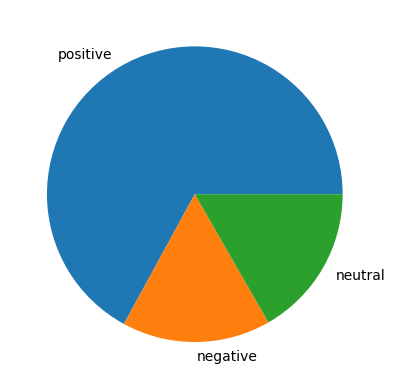

In [176]:
posi=0
nega=0
neu=0
for i in range(len(dataframe)):
    get_val=dataframe.Comp[i]
    if float(get_val) < 0:
        nega += 1
    if float(get_val) > 0:
        posi += 1
    if get_val == 0 :
        neu  += 1
posper = (posi/(len(dataframe)))*100
negper = (nega/(len(dataframe)))*100
neuper = (neu/(len(dataframe)))*100
print("% of positive tweets= ",format(posper, '.2f'))
print("% of negative tweets= ",format(negper, '.2f'))
print("% of neutral tweets= ",format(neuper, '.2f'))
arr=np.asarray([posper,negper,neuper], dtype=float)
plt.pie(arr,labels=['positive','negative','neutral'])
plt.plot()

In [194]:
dataframe = dataframe.reset_index()

In [195]:
dataframe = dataframe[['adj_close_price','Comp','Negative','Neutral','Positive','Date']]

In [196]:
dataframe

,adj_close_price,Comp,Negative,Neutral,Positive,Date
0,31.84,0.9809,0.0,0.84,0.9809,2012-11-16
1,32.92,0.9442,0.0,0.672,0.9442,2012-11-19
2,33.00,0.2263,0.0,0.957,0.2263,2012-11-20
3,32.47,0.9136,0.0,0.694,0.9136,2012-11-21
4,32.65,0.6369,0.0,0.822,0.6369,2012-11-22
...,...,...,...,...,...,...
887,344.99,0.6662,0.0,0.874,0.6662,2017-09-25
888,345.25,0.8192,0.0,0.827,0.8192,2017-09-26
889,340.97,-0.5535,0.137,0.759,-0.5535,2017-09-27
890,339.60,0.6989,0.0,0.722,0.6989,2017-09-28


In [180]:
train_data_start = 0
train_data_end = 624
test_data_start = 625
test_data_end = 891
train = dataframe.loc[train_data_start : train_data_end]
test = dataframe.loc[test_data_start:test_data_end]

In [181]:
list_of_sentiments_score = []
for date, row in train.iterrows():
    sentiment_score = np.asarray([dataframe.loc[date, 'Comp']])
    list_of_sentiments_score.append(sentiment_score)
numpy_dataframe_train = np.asarray(list_of_sentiments_score)

In [182]:
list_of_sentiments_score = []
for date, row in test.iterrows():
    sentiment_score = np.asarray([dataframe.loc[date, 'Comp']])
    list_of_sentiments_score.append(sentiment_score)
numpy_dataframe_test = np.asarray(list_of_sentiments_score)

In [183]:
y_train = pd.DataFrame(train['adj_close_price'])
y_test = pd.DataFrame(test['adj_close_price'])

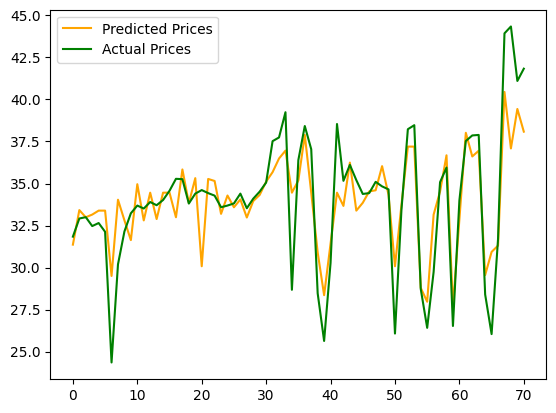

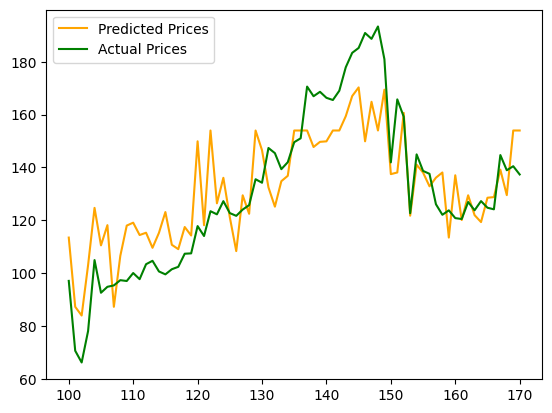

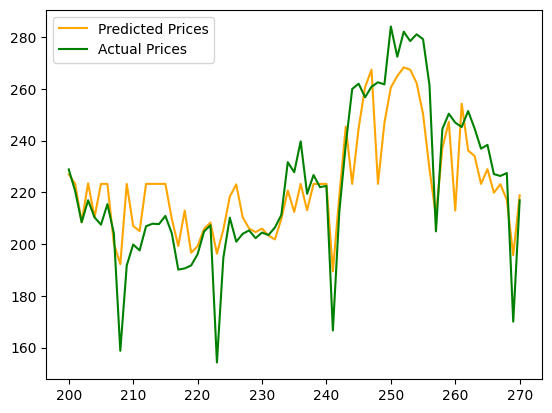

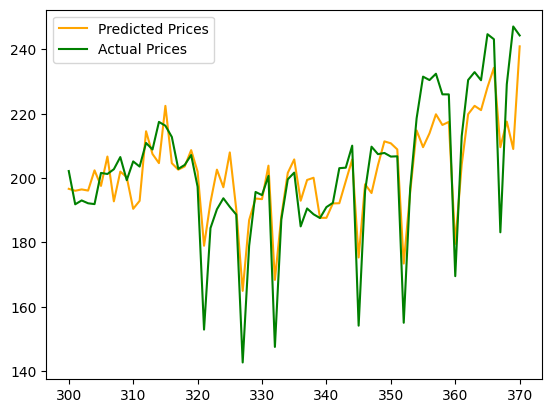

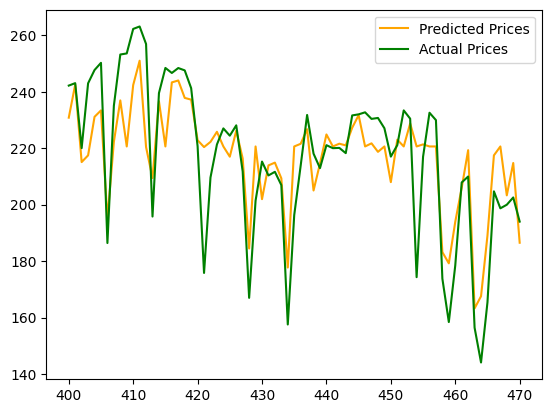

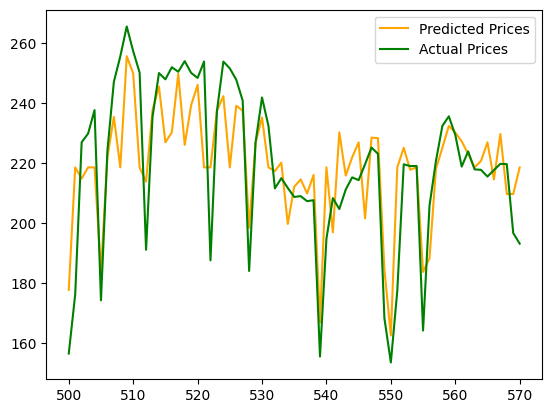

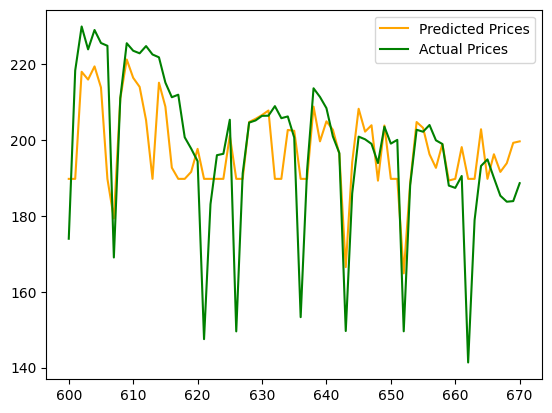

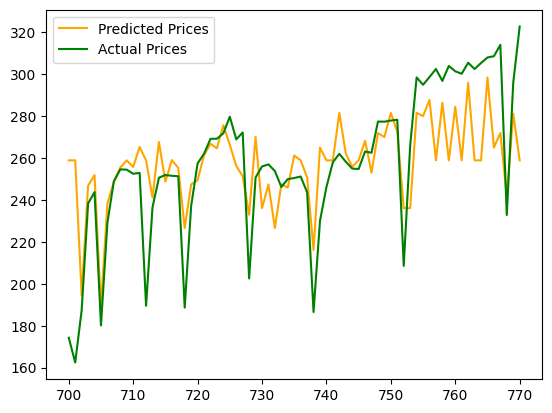

In [188]:
from treeinterpreter import treeinterpreter as tree_interpreter
# from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# from sklearn.linear_model import LogisticRegression
# from datetime import datetime, timedelta
jumps = [0 ,100, 200, 300, 400, 500, 600, 700]
prediction_list = []
for jump in jumps:
    train_data_start = jump
    train_data_end = jump + 70
    test_data_start = jump + 71
    test_data_end = jump + 100
    train = dataframe.loc[train_data_start : train_data_end]
    test = dataframe.loc[test_data_start:test_data_end]
    
    list_of_sentiments_score = []
    for date, row in train.iterrows():
        sentiment_score = np.asarray([dataframe.loc[date, 'Comp']])
        list_of_sentiments_score.append(sentiment_score)
    numpy_dataframe_train = np.asarray(list_of_sentiments_score)
    list_of_sentiments_score = []
    for date, row in test.iterrows():
        sentiment_score = np.asarray([dataframe.loc[date, 'Comp']])
        list_of_sentiments_score.append(sentiment_score)
    numpy_dataframe_test = np.asarray(list_of_sentiments_score)

    rf = RandomForestRegressor(random_state=25)
    rf.fit(numpy_dataframe_train, train['adj_close_price'])
    
    prediction = rf.predict(numpy_dataframe_test)
    prediction_list.append(prediction)
    start = int(test_data_start)
    stop = int(test_data_end)
    idx = np.arange(start, stop+1)
    predictions_dataframe_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['adj_close_price'])

    predictions_dataframe_list['adj_close_price'] = predictions_dataframe_list['adj_close_price'] + 0
    predictions_dataframe_list

    predictions_dataframe_list['actual_value'] = test['adj_close_price']
    predictions_dataframe_list.columns = ['predicted_price','actual_price']
    
    prediction = rf.predict(numpy_dataframe_train)
    start = int(train_data_start)
    stop = int(train_data_end)
    idx = np.arange(start, stop+1)
    predictions_dataframe1 = pd.DataFrame(data=prediction[0:], index = idx, columns=['Predicted Prices'])
    predictions_dataframe1['Predicted Prices']=predictions_dataframe1['Predicted Prices'].apply(np.float64)
    predictions_dataframe1["Actual Prices"]=train['adj_close_price']
    predictions_dataframe1.columns=['Predicted Prices','Actual Prices']
    predictions_dataframe1.plot(color=['orange','green'])
    
    

In [189]:
dataframe

,adj_close_price,Comp,Negative,Neutral,Positive,Date
0,31.84,0.9809,0.0,0.84,0.9809,2012-11-16
1,32.92,0.9442,0.0,0.672,0.9442,2012-11-19
2,33.00,0.2263,0.0,0.957,0.2263,2012-11-20
3,32.47,0.9136,0.0,0.694,0.9136,2012-11-21
4,32.65,0.6369,0.0,0.822,0.6369,2012-11-22
...,...,...,...,...,...,...
887,344.99,0.6662,0.0,0.874,0.6662,2017-09-25
888,345.25,0.8192,0.0,0.827,0.8192,2017-09-26
889,340.97,-0.5535,0.137,0.759,-0.5535,2017-09-27
890,339.60,0.6989,0.0,0.722,0.6989,2017-09-28


<Figure size 4000x4000 with 0 Axes>

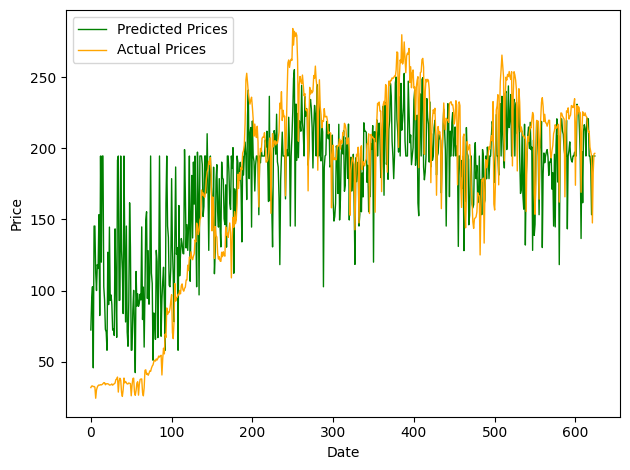

In [200]:
from sklearn.ensemble import RandomForestRegressor

train_data_start = 0
train_data_end = 624
test_data_start = 625
test_data_end = 891
train = dataframe.loc[train_data_start : train_data_end]
test = dataframe.loc[test_data_start:test_data_end]

list_of_sentiments_score = []
for date, row in train.iterrows():
    sentiment_score = np.asarray([row['Comp']])
    list_of_sentiments_score.append(sentiment_score)
numpy_dataframe_train = np.asarray(list_of_sentiments_score)

list_of_sentiments_score = []
for date, row in test.iterrows():
    sentiment_score = np.asarray([row['Comp']])
    list_of_sentiments_score.append(sentiment_score)
numpy_dataframe_test = np.asarray(list_of_sentiments_score)

rf = RandomForestRegressor(random_state=25)
rf.fit(numpy_dataframe_train, train['adj_close_price'])

prediction = rf.predict(numpy_dataframe_test)
prediction_list.append(prediction)

start = int(test_data_start)
stop = int(test_data_end)
idx = np.arange(start, stop+1)
predictions_dataframe_list = pd.DataFrame(data=prediction[:], index = idx, columns=['adj_close_price'])

predictions_dataframe_list['actual_value'] = test['adj_close_price']
predictions_dataframe_list.columns = ['predicted_price','actual_price']

prediction = rf.predict(numpy_dataframe_train)
start = int(train_data_start)
stop = int(train_data_end)
idx = np.arange(start, stop+1)
predictions_dataframe1 = pd.DataFrame(data=prediction[0:], index = idx, columns=['Predicted Prices'])
predictions_dataframe1['Predicted Prices']=predictions_dataframe1['Predicted Prices'].apply(np.float64)
predictions_dataframe1["Actual Prices"]=train['adj_close_price']
predictions_dataframe1.columns=['Predicted Prices','Actual Prices']

# Increase figure size
plt.figure(figsize=(40, 40))

# Plot the data with wider spacing
predictions_dataframe1.plot(color=['green', 'orange'], linewidth=1)

# Set the axis labels
plt.xlabel('Date')
plt.ylabel('Price')

# Adjust the spacing between the subplots
plt.tight_layout()

# Display the plot
plt.show()
    

rf = RandomForestRegressor(random_state=25): This line initializes a RandomForestRegressor model. The random_state parameter is set to 25 to ensure reproducibility of the model's behavior.

rf.fit(numpy_dataframe_train, train['adj_close_price']): This line trains the RandomForestRegressor model. It takes as input the training data, represented by numpy_dataframe_train, which is a NumPy array or pandas DataFrame containing the features or independent variables, and train['adj_close_price'], which represents the corresponding target or dependent variable (in this case, the adjusted close price). The model learns the relationships between the features and the target variable during the training process.

prediction = rf.predict(numpy_dataframe_test): This line uses the trained RandomForestRegressor model to make predictions on the test data. numpy_dataframe_test represents the test data, which contains the same features as the training data but does not have the corresponding target variable. The model uses the learned patterns from the training data to predict the target variable values for the test data. The predicted values are stored in the prediction variable.